# Aprendizado de Máquina - Classificação

- Wesley Bernardes de Souza Júnior
- RA: 00020451

###  Fazendo o setup do ambiente

Instalando bibliotecas para exibir os gráficos da classificação.

In [ ]:
!pip install mlxtend --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.22.0
    Uninstalling mlxtend-0.22.0:
      Successfully uninstalled mlxtend-0.22.0


### O conjunto de dados

 No exercício, o conjunto de dados utilizado será da espécies de feijões, classificados por: Barbunya, Bombyay, Cali, Dermason, Horoz, Seker e Sira.

Foi importado o conjunto de dados de um repositório, criado para que os dados fossem empregados no exercício de aprendizado de máquina.

### Importando o conjunto de dados

Foi importado a biblioteca (pandas) para carregar os dados do conjunto de espécies de feijões, mas no colab, apenas 5 registros serão exibidos.

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/bpimentacaetano/arqAulas/main/Dry_Bean_Min.csv")

df.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  77724   1121.666       401.746736       247.387750      1.623956   
1  58836    962.165       327.389495       229.899974      1.424052   
2  60730    951.837       340.026971       228.242007      1.489765   
3  70023   1025.656       363.034186       246.508518      1.472704   
4  62363    950.295       360.506342       220.634377      1.633954   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.787918       79022     314.581103  0.702196  0.983574   0.776315   
1      0.711958       60103     273.701154  0.709380  0.978920   0.798645   
2      0.741234       61724     278.071641  0.745748  0.983896   0.842341   
3      0.734117       71050     298.590108  0.719809  0.985545   0.836464   
4      0.790848       63010     281.785446  0.690528  0.989732   0.867801   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  \
0     0.783033      0.005169      0.001199      0.613141      0.995714   
1     0.836011      0.005564      0.001677      0.698914      0.995290   
2     0.817793      0.005599      0.001545      0.668785      0.996333   
3     0.822485      0.005184      0.001464      0.676481      0.996257   
4     0.781638      0.005781      0.001331      0.610958      0.998277   

      Class  
0  BARBUNYA  
1  BARBUNYA  
2  BARBUNYA  
3  BARBUNYA  
4  BARBUNYA

Cada registro desse conjunto corresponde a um feijão.

Em seguida, foi importado seaborn e adicionado os nomes das colunas para que a biblioteca (seaborn) pudesse criar o gráfico para analisarmos como os atributos estão relacionados. Cada cor representa uma espécie, como demonstra na legenda.

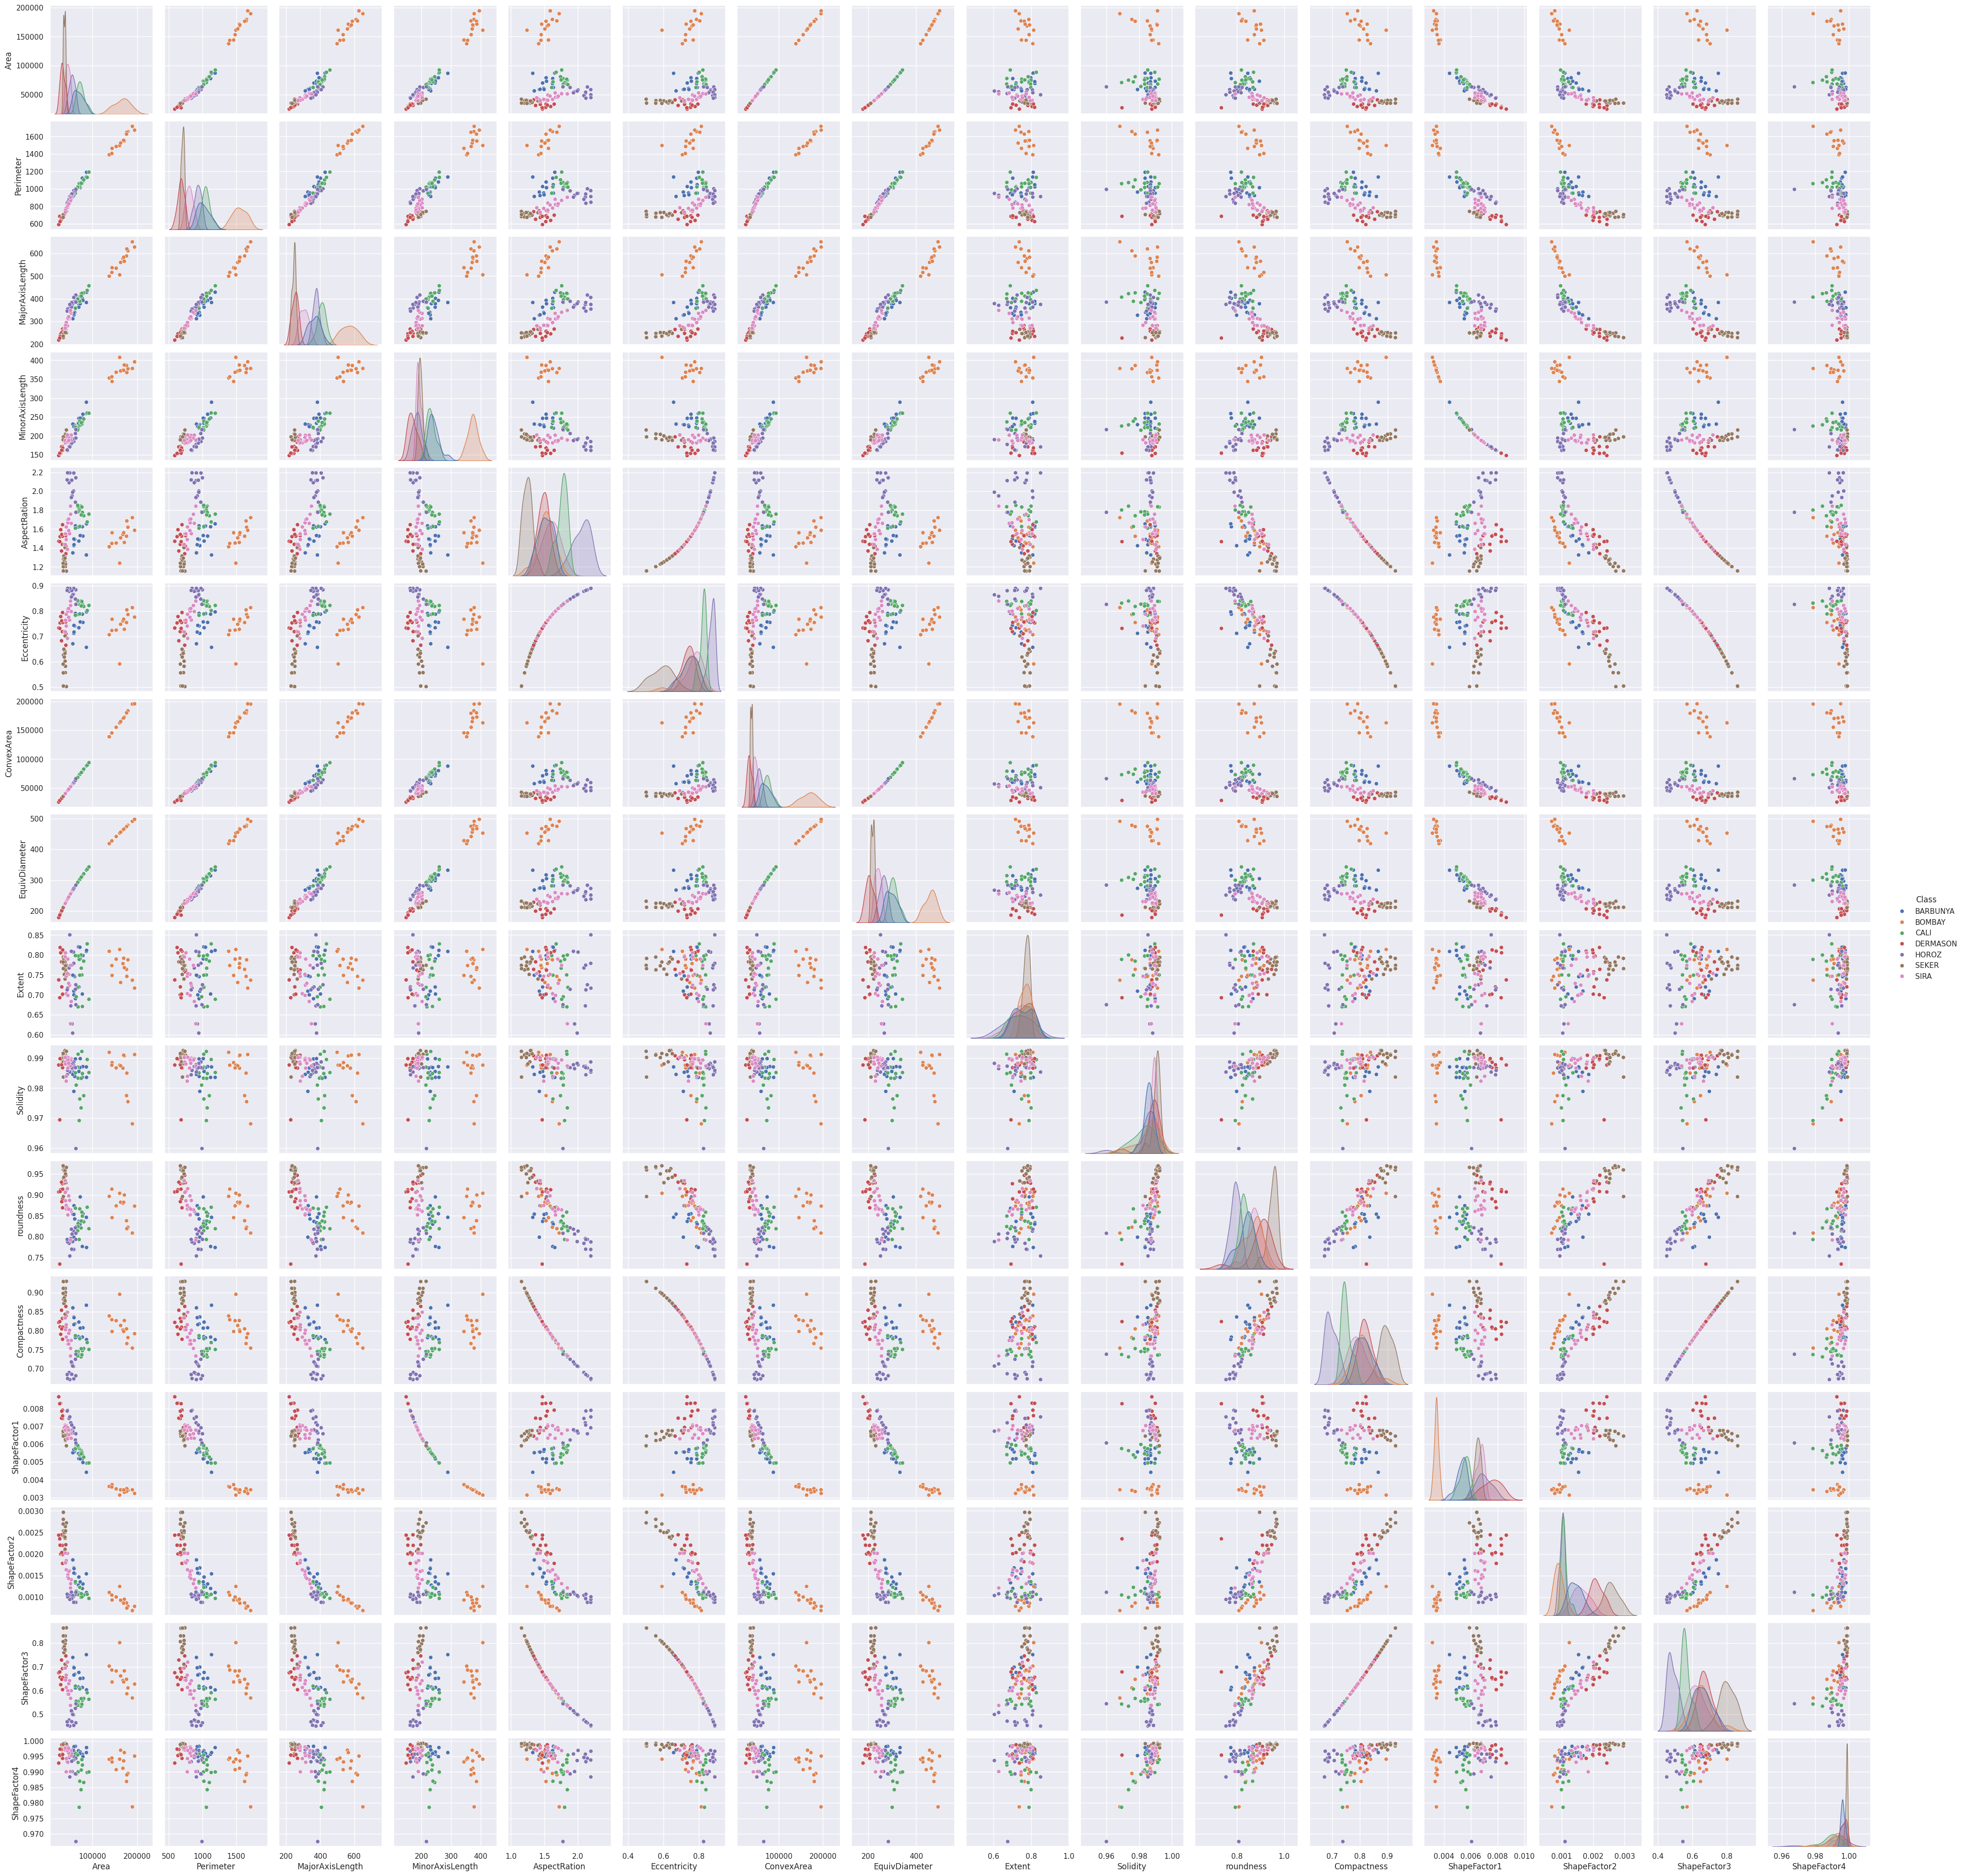

In [ ]:
import seaborn as sns

sns.set()

sns.pairplot(df[['Area',
                 'Perimeter',
                 'MajorAxisLength',
                 'MinorAxisLength',
                 'AspectRation',
                 'Eccentricity',
                 'ConvexArea',
                 'EquivDiameter',
                 'Extent',
                 'Solidity',
                 'roundness',
                 'Compactness',
                 'ShapeFactor1',
                 'ShapeFactor2',
                 'ShapeFactor3',
                 'ShapeFactor4',
                 'Class']],
             hue="Class", diag_kind="kde")

Através dos gráficos de dispersão, podemos perceber que algumas combinações de atributos resultam em distribuições onde é mais fácil encontrar as divisões entre as classes. Na maioria das combinações, a classe Bombay é a que se separa mais facilmente das outras duas classes.

## Criando um modelo de classificação

Após definir os atributos, foi criado o modelo de classificação, Naïve Bayes.

### Preparando o conjunto

Por se tratar de um problema de aprendizado supervisionado, o objetivo é a identificação de uma classe previamente informada. Sendo assim, foi dividido nosso conjunto entre as amostras e os rótulos, X e y respectivamente:

In [76]:
X = df[['Compactness', 'EquivDiameter']]

y = df['Class']

print("Variável X:", X)

print("Classes (y):", y)

Variável X:     Compactness  EquivDiameter
0      0.783033     314.581103
1      0.836011     273.701154
2      0.817793     278.071641
3      0.822485     298.590108
4      0.781638     281.785446
..          ...            ...
93     0.802581     226.357473
94     0.773986     240.715306
95     0.833508     224.977980
96     0.764587     240.530106
97     0.764728     245.299873

[98 rows x 2 columns]
Classes (y): 0     BARBUNYA
1     BARBUNYA
2     BARBUNYA
3     BARBUNYA
4     BARBUNYA
        ...   
93        SIRA
94        SIRA
95        SIRA
96        SIRA
97        SIRA
Name: Class, Length: 98, dtype: object


Agora temos a variável X que armazena nossos 2 atributos e a variável y com os valores das respectivas classes.

A variável y armazena os valores das classes no formato textual. Entretanto, algoritmos de aprendizado de máquina são modelos computacionais que manipulam informações numéricas. Dessa forma, precisamos realizar a codificação dos valores textuais para valores numéricos:

In [77]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6])

Após a transformação, as classes Barbunya, Bombyay, Cali, Dermason, Horoz, Seker e Sira são representadas pelos valores 0, 1, 2, 3, 4, 5 e 6 respectivamente.

### Separando o conjunto

Agora, iremos separar nosso conjunto em amostras de treinamento e teste. Essa etapa é importante para que seja possível validar se o modelo gerado é capaz de executar bem a classificação dos dados.

In [78]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.8, random_state=42)

A função executada gera uma divisão na qual 80% do conjunto compõe as amostras de treinamento e 20% as amostras de teste.

In [79]:
print("Quantidade de amostras de treinamento:", X_treino.shape[0])

print("Quantidade de amostras de teste:", X_teste.shape[0])

Quantidade de amostras de treinamento: 78
Quantidade de amostras de teste: 20


### Treinando e avaliando o modelo

Vamos agora treinar um modelo de classificação que permita identificar as classes do nosso problema.

Utilizaremos o algoritmo Naïve Bayes. Podemos treinar o modelo, utilizando a biblioteca sklearn, através do método fit(), que espera as amostras do conjunto de treinamento com seus respectivos rótulos. Em seguida, vamos utilizar o método score() que quantifica o acerto do modelo na fase de treinamento:   

In [80]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_treino.values, y_treino)
nb.score(X_treino.values, y_treino)

0.8974358974358975

Esse valor indica que o modelo é capaz de encontrar corretamente a classe para 89% das amostras do conjunto de treinamento.

Depois da etapa de treinamento, podemos utilizar o modelo para prever os valores de classe para as amostras de teste e assim verificar quanto ele acerta com amostras que ainda não foram apresentadas. Para isso, utilizaremos o método predict(), que retorna os valores previstos, e a métrica de acurácia:

In [82]:
from sklearn.metrics import accuracy_score

y_previsto = nb.predict(X_teste.values)

accuracy_score(y_teste, y_previsto)

0.9

Essa pontuação nos diz que o modelo tem um acerto de 90% para os dados de teste.

Vamos visualizar essa classificação através de um gráfico:

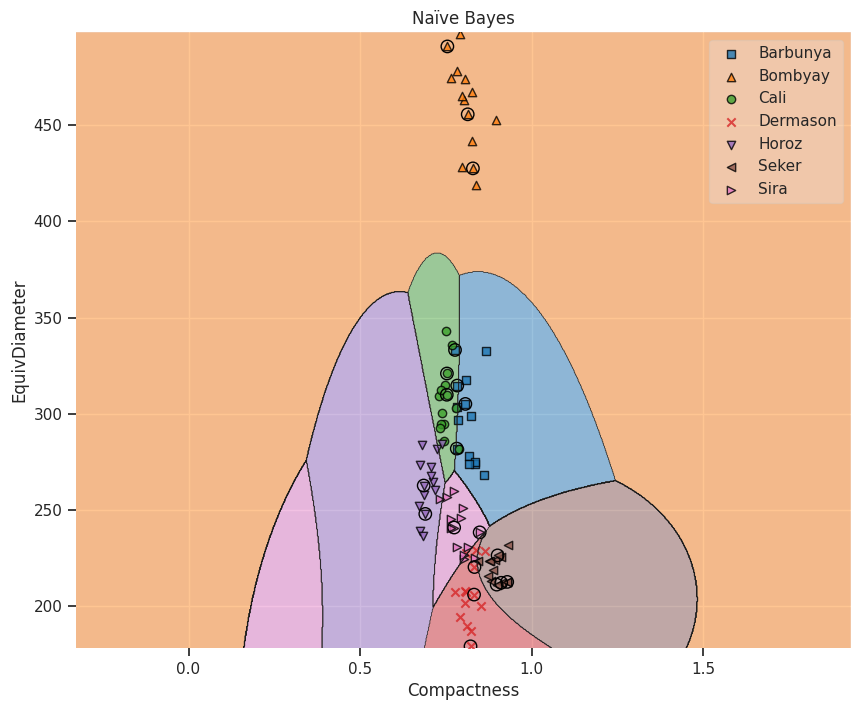

In [81]:
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

plt.figure(figsize = (10,8))

ax = plot_decision_regions(X.values, y, clf=nb, legend=2, X_highlight=X_teste.values)

# Adding axes annotations
ax.set_xlabel('Compactness')
ax.set_ylabel('EquivDiameter')
ax.set_title('Naïve Bayes')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, ['Barbunya', 'Bombyay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'], framealpha=0.3, scatterpoints=1)

plt.show()

Através da figura acima, é possível verificar as fronteiras de decisão gerados pelo modelo, no entanto mesmo com as fronteiras delimitadas é possível ver que algumas amostras foram classificadas incorretamente.

Text(0.5, 1.0, 'Matriz de confusão - Naïve Bayes')

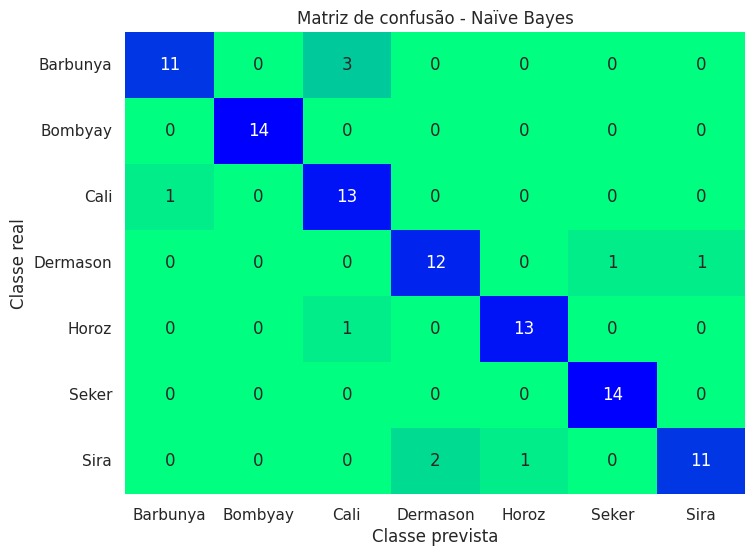

In [83]:
from sklearn.metrics import confusion_matrix

import seaborn as sn

y_previsto = nb.predict(X.values)

cm = confusion_matrix(y, y_previsto)

plt.figure(figsize = (8,6))

sn.heatmap(cm, annot=True, cmap= 'winter_r',
    xticklabels = ['Barbunya', 'Bombyay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
    yticklabels = ['Barbunya', 'Bombyay', 'Cali', 'Dermason', 'Horoz', 'Seker', 'Sira'],
cbar=False)

plt.xlabel('Classe prevista')

plt.ylabel('Classe real')

plt.title('Matriz de confusão - Naïve Bayes')

Através da matriz de confusão, podemos notar que o modelo classifica incorretamente algumas amostras, no entanto tem boa acurácia para outras, apenas teve algumas dispersões, que para o exercício não é um problema, mas em aplicações reais teríamos de encontrar uma combinação onde as espécies estivessem totalmente classificadas.


## Fontes:

1. [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)
2. [sklearn-som](https://pypi.org/project/sklearn-som/)